# Simple KMeans Clustering

## Random data

In [1]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random 

import warnings
warnings.filterwarnings("ignore")

In [6]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)
data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)
data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)
data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

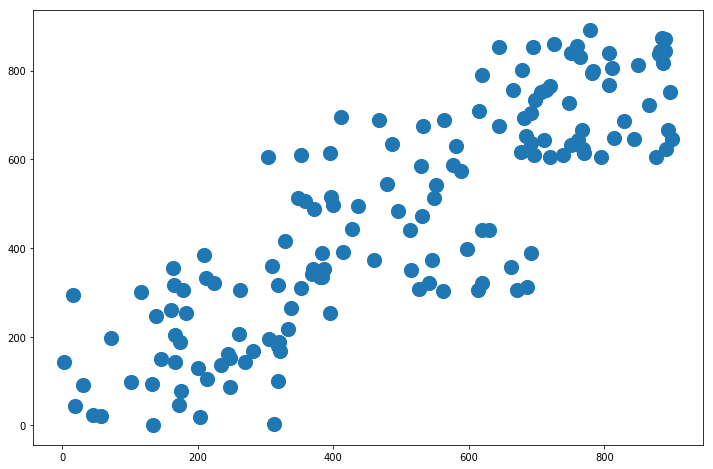

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(data[:,0], data[:,1], s=200)

In [8]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)

In [9]:
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})
df.sample(10)

,data_x,data_y,labels
127,806.0,767.0,2
66,460.0,374.0,1
130,750.0,632.0,2
139,665.0,757.0,2
13,320.0,189.0,0
149,829.0,686.0,2
54,545.0,373.0,1
133,692.0,637.0,2
89,486.0,635.0,1
28,209.0,384.0,0


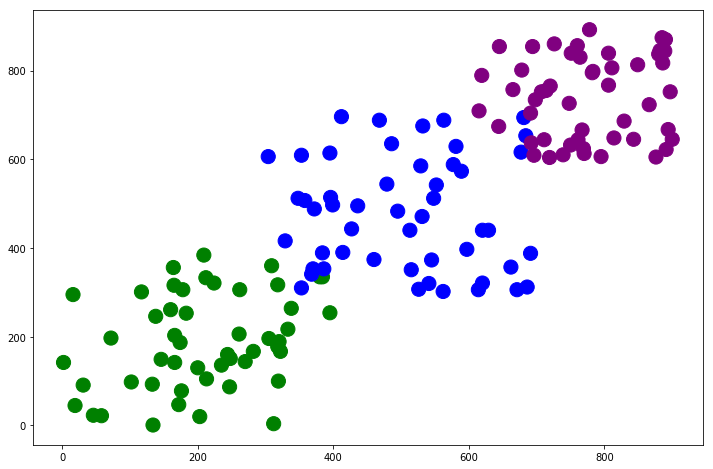

In [10]:
colors = ['green','blue','purple']
plt.figure(figsize=(12, 8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, 
            cmap=matplotlib.colors.ListedColormap(colors))

In [11]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)
centroids = kmeans_model.cluster_centers_
centroids

array([[478.70833333, 441.08333333],
       [758.26785714, 730.23214286],
       [193.76086957, 176.82608696]])

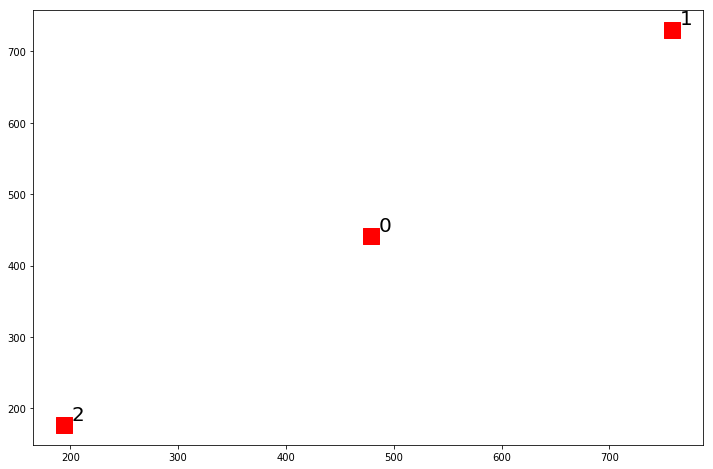

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [13]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.8007418685082129
Completeness_score:  0.8034301610449317
v_measure_score:  0.8020837622386183
Adjusted_rand_score:  0.8130489335006275
Adjusted_mutual_info_score:  0.7982477888191187
Silhouette_score:  0.5148647546404345


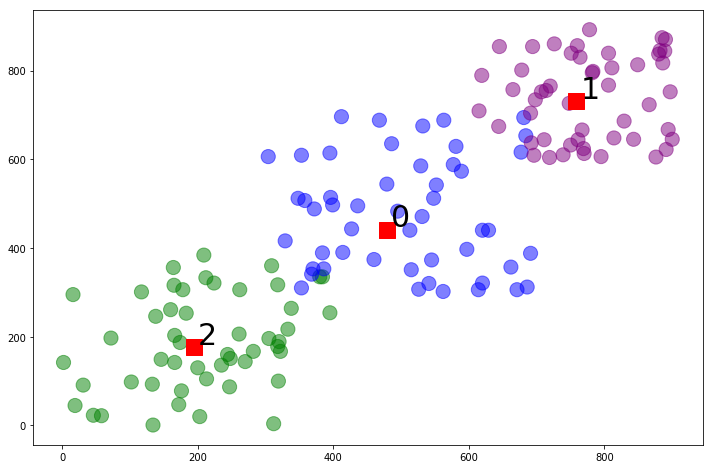

In [14]:
colors = ['green','blue','purple']
plt.figure(figsize=(12, 8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

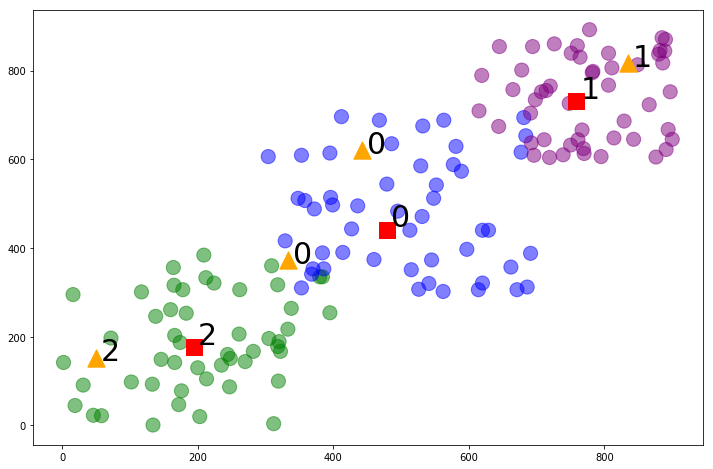

In [15]:
data_test = np.array([[442., 621.],
                      [ 50., 153.],
                      [ 333., 373.],
                      [835., 816.]])
label_pred = kmeans_model.predict(data_test)

colors = ['green','blue','purple']
plt.figure(figsize=(12, 8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')
for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

## Iris dataset

In [16]:
iris_df = pd.read_csv('data/iris.csv', 
                      skiprows=1, 
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df[iris_df.isnull().any(axis=1)]
iris_df['class'].unique()

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [18]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.4,2.9,1.4,0.2,0
1,6.9,3.1,5.4,2.1,2
2,5.1,2.5,3.0,1.1,1
3,6.5,2.8,4.6,1.5,1
4,6.4,2.7,5.3,1.9,2


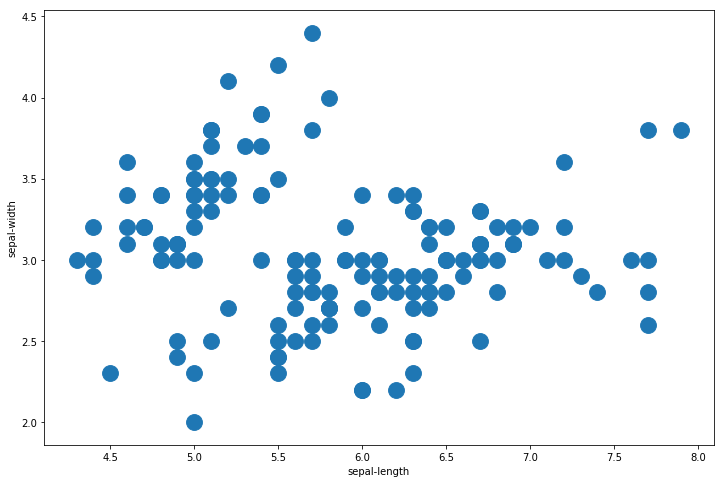

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['sepal-width'], s=250)
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.show()

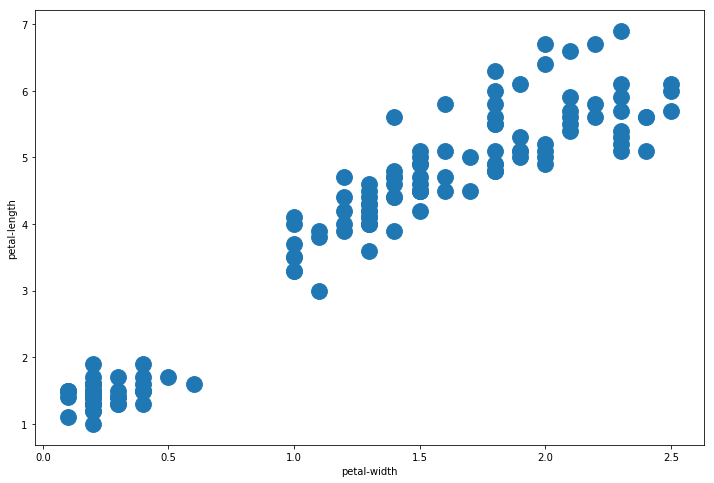

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['petal-width'], iris_df['petal-length'], s=250)
plt.xlabel('petal-width')
plt.ylabel('petal-length')
plt.show()

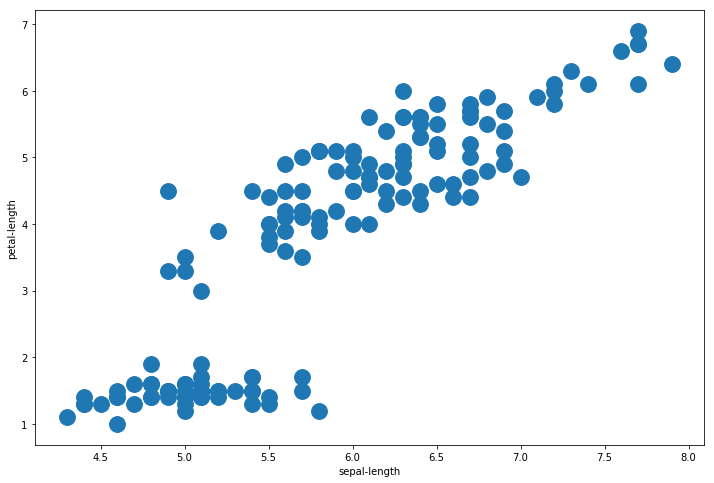

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], s=250)
plt.xlabel('sepal-length')
plt.ylabel('petal-length')
plt.show()

In [22]:
iris_2D = iris_df[['sepal-length', 'petal-length']]
iris_2D.sample(5)

,sepal-length,petal-length
118,5.6,3.6
43,5.4,4.5
113,5.8,5.1
71,6.2,4.8
136,5.9,5.1


In [23]:
iris_2D = np.array(iris_2D)
kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)
centroids_2D = kmeans_model_2D.cluster_centers_
centroids_2D

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

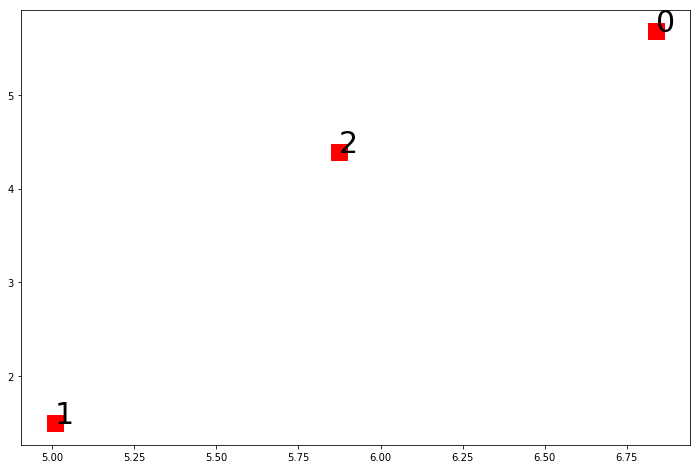

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')
for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

In [26]:
iris_labels = iris_df['class']
print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))
print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model_2D.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.6996030957074747
Silhouette_score:  0.5890612473759282


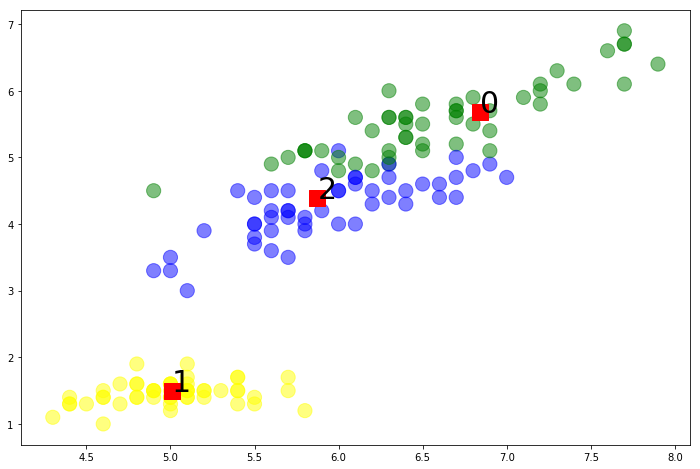

In [27]:
colors = ['yellow','blue','green']

plt.figure(figsize=(12, 8))

plt.scatter(iris_df['sepal-length'], iris_df['petal-length'], c=iris_df['class'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

for i in range(len(centroids_2D)):
    plt.annotate( i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)